# Task: Customer Preference Analysis

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

#handle missing values
# Replace NaN values in 'Cuisines' column with the mode of the column
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
missing_values = df.isnull().sum()
print(missing_values)

# Convert categorical columns to 'category' type
categorical_columns = [ "Restaurant Name", "City", "Address", "Locality", "Locality Verbose","Cuisines", "Currency", "Rating color", "Rating text" ]
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert binary columns to boolean type (assuming "Yes"/"No" values)
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]
df[binary_columns] = df[binary_columns].map(lambda x: True if x == "Yes" else False)
print(df.dtypes)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID              int64
Restaurant Name         category
Country Code               int64
City                    category
Address                 category
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking           bool
Has Online d

To perform a Customer Preference Analysis based on the type of cuisine, we can break the task into a few steps:

Analyze the relationship between the type of cuisine and the restaurant's rating.

Identify the most popular cuisines based on the number of votes.

Determine if specific cuisines tend to receive higher ratings.

### 1. Relationship between Cuisine Type and Rating:

This analysis involves checking whether there is any correlation between the type of cuisine and the restaurant's rating. We can use groupby to calculate the average rating for each cuisine.

Reveals the cuisines with the highest average ratings, showing what customers rate the best.

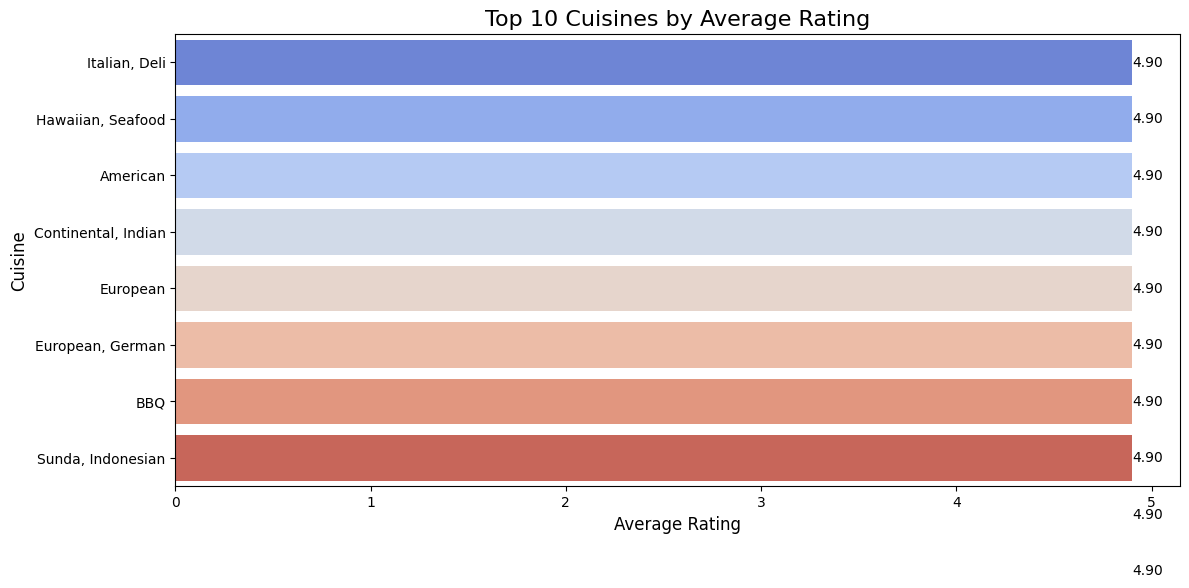

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Grouping by cuisines and calculating the average rating
cuisine_rating = df.groupby('Cuisines', observed=False)['Aggregate rating'].mean().sort_values(ascending=False)

# Restrict to the top 10 cuisines by average rating
cuisine_rating_top = cuisine_rating.head(10)

# Shorten long cuisine names (optional)
cuisine_rating_top.index = [c.split(",")[0].strip() if len(c) > 20 else c for c in cuisine_rating_top.index]

plt.figure(figsize=(12, 6))  # Increase figure size
sns.barplot(x=cuisine_rating_top.values, y=cuisine_rating_top.index, palette='coolwarm')

# Add graph title and labels
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

# Annotate bars with rating values
for index, value in enumerate(cuisine_rating_top.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

### 2. Identify the Most Popular Cuisines Based on Votes

This step the cuisines that have received the most votes. This will give us an idea of the most popular cuisines among customers.

Highlights the cuisines with the most votes, reflecting popularity.

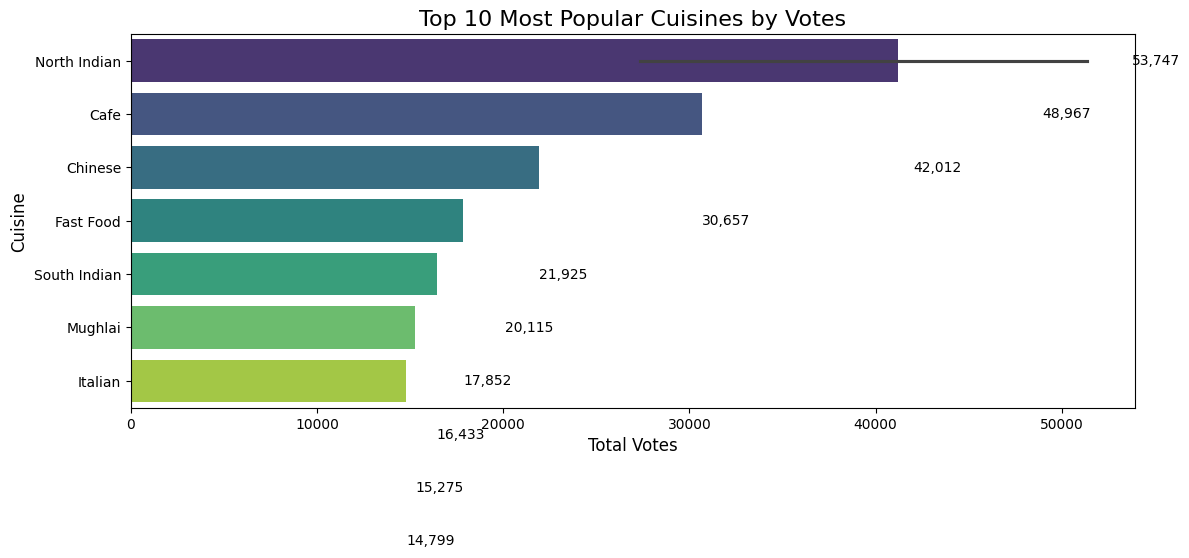

In [9]:
# Group by 'Cuisines' and calculate total votes
cuisine_votes = df.groupby('Cuisines', observed=False)['Votes'].sum().sort_values(ascending=False)

# Top 10 cuisines by votes
cuisine_votes_top = cuisine_votes.head(10)

# Shorten long cuisine names (optional)
cuisine_votes_top.index = [c.split(",")[0].strip() if len(c) > 20 else c for c in cuisine_votes_top.index]

# Plot the votes
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_votes_top.values, y=cuisine_votes_top.index, palette='viridis')

plt.title('Top 10 Most Popular Cuisines by Votes', fontsize=16)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

# Annotate bars with vote values
for index, value in enumerate(cuisine_votes_top.values):
    plt.text(value, index, f'{value:,}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

### 3. Determine Cuisines with Higher Ratings

This step uses both ratings and votes to assess which cuisines are both highly rated and popular.

Combines popularity (votes) and quality (ratings) to identify cuisines that are both popular and well-rated.

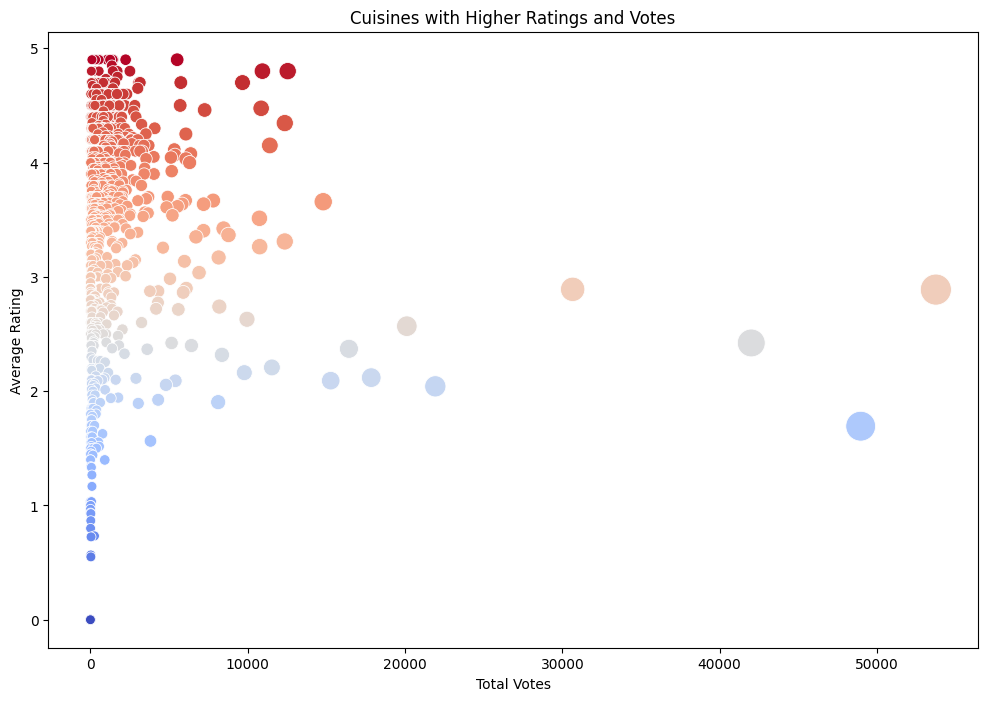

In [10]:
# Calculate the average rating and total votes for each cuisine
cuisine_analysis = df.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).sort_values(by='Aggregate rating', ascending=False)

# Scatter plot for cuisines based on ratings and votes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cuisine_analysis, x='Votes', y='Aggregate rating', size='Votes', sizes=(50, 500), hue='Aggregate rating', palette='coolwarm', legend=False)
plt.title('Cuisines with Higher Ratings and Votes')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()